In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import viz # curriculum viz example code

np.random.seed(123)

<BarContainer object of 11 artists>

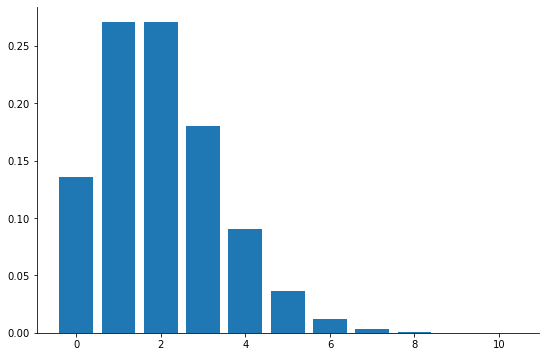

In [12]:
# A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. 
# Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.


x = np.arange(0,11)
y = stats.poisson.pmf(x, 2)

plt.bar(x,y)



In [5]:
# What is the probability that no cars drive up in the noon hour?
stats.poisson(2).pmf(0)

0.1353352832366127

In [6]:
# What is the probability that 3 or more cars come through the drive through?
stats.poisson(2).sf(2)

0.32332358381693654

In [22]:
# How likely is it that the drive through gets at least 1 car?
stats.poisson(2).sf(0)

0.8646647167633873

In [61]:
# Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:
grades = stats.norm(3, .3)

# If I have a GPA of 3.5, what percentile am I in?
grades.cdf(3.5)

0.9522096477271853

In [14]:
# What grade point average is required to be in the top 5% of the graduating class?
grades.isf(.05)

3.4934560880854417

In [15]:
# What GPA constitutes the bottom 15% of the class?
grades.ppf(.15)

2.689069983151863

In [17]:
# An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
# Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
grades.ppf(.30) 


2.842679846187588

In [56]:
grades.ppf(.20)
#2.8 GPA would qualify as it lies between 2.747 and 2.842

2.7475136299281258

In [57]:
grades.ppf([.20, .30]) 
# given the range within one line of code**

array([2.74751363, 2.84267985])

In [20]:
# A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. 
# How likely is it that this many people or more click through?

stats.binom(4326, .02).sf(96)

0.13975823631416445

In [62]:
# You are working on some statistics homework consisting of 100 questions where all of the answers are a 
# probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the 
# answer to each question.

# What is the probability that at least one of your first 60 answers is correct?

# probability of each digit correct in 4 digit number? 
stats.binom(60, .01).sf(0)

0.45284335760923855

In [63]:
# The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's 
# a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% 
# of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets 
# cleaned up each day? 

trials = round(.9 * 3 *22)
# 
p = .03

stats.binom(trials, .03).sf(0)


0.8342199288437352

In [45]:
# How likely is it that it goes two days without getting cleaned up?
clean = stats.binom(59, .03).sf(0)
stats.binom(2, clean).pmf(0)

0.026821436301629097

In [65]:
# instructor provided answer
stats.binom(trials * 2, .03).pmf(0)

0.027483031992576134

In [ ]:
# All week?

In [54]:
stats.binom(5, clean).pmf(0)

0.00011781621791055168

In [55]:
1-stats.binom(5, clean).sf(0)

0.00011781621791051577

In [66]:
# instructor provided answer
stats.binom(trials * 5, .03).pmf(0)

0.00012521651388091245

In [67]:
# You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. 
# After several weeks of careful observation, you notice that the average number of people in line when 
# your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. 
# If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what
# is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class?
# Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

mean = 15 * 2 #minutes
std_dev = 3 * 2 #minutes

# time allowed = 60 - (15 + 10 + 2)

stats.norm(mean, std_dev).cdf(33)

0.6914624612740131

In [68]:
mean = 15 
std_dev = 3

stats.norm(mean, std_dev).cdf(16)

0.6305586598182363

In [70]:
# Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.



from env import get_db_url
import pandas as pd


url = get_db_url("employees")

sql = '''
SELECT * FROM salaries
WHERE to_date > NOW() 
'''
salaries = pd.read_sql(sql, url)
salaries

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01
...,...,...,...,...
240119,499995,52868,2002-06-01,9999-01-01
240120,499996,69501,2002-05-12,9999-01-01
240121,499997,83441,2001-08-26,9999-01-01
240122,499998,55003,2001-12-25,9999-01-01


In [75]:
mean = salaries.salary.mean()
mean

72012.23585730705

In [76]:
st_dev = salaries.salary.std()
st_dev

17309.99538025198

In [77]:
# What percent of employees earn less than 60,000?

stats.norm(mean, st_dev).cdf(60000)

0.24385742480214423

In [78]:
# What percent of employees earn more than 95,000?
stats.norm(mean, st_dev).sf(95000)

0.09208819199804053

In [79]:
# What percent of employees earn between 65,000 and 80,000?
np.diff(stats.norm(mean, st_dev).cdf([65000, 80000]))

array([0.33506057])

In [80]:
# What do the top 5% of employees make?
stats.norm(mean, st_dev).isf(.05)

100484.64454102777